# BUSARA MENTAL HEALTH CHALLENGE <br>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Loading data

In [3]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


### Combining Train and Test

In [4]:
split = data.shape[0]
datasets = pd.concat([data, test], axis=0)
datasets.shape

(1429, 75)

In [5]:
(datasets['age'].value_counts()).head()

22.0    56
26.0    56
25.0    56
23.0    54
27.0    49
Name: age, dtype: int64

In [6]:
def fun(a):
    if a == '.d':
        return 22
    else:
        return a

In [7]:
datasets['age'] = datasets.age.apply(fun)

In [8]:
datasets['age'] = datasets['age'].astype('float')

In [9]:
datasets.isnull().sum()

surveyid                      0
village                       0
survey_date                   0
femaleres                     0
age                           1
married                       0
children                      0
hhsize                        0
edu                           0
hh_children                   0
hh_totalmembers             424
cons_nondurable               0
asset_livestock               0
asset_durable                 0
asset_phone                   0
asset_savings                 0
asset_land_owned_total        0
asset_niceroof                0
cons_allfood                  0
cons_ownfood                  0
cons_alcohol                 55
cons_tobacco                 27
cons_med_total                0
cons_med_children           529
cons_ed                       0
cons_social                   0
cons_other                    0
ent_wagelabor                 0
ent_ownfarm                   0
ent_business                  0
                           ... 
med_expe

## Data cleaning

In [10]:
datasets.drop('survey_date', axis = 1,inplace =True)

## Dropping columns with a lot of missing values

In [11]:
datasets.drop([ 'hh_children', 'hh_totalmembers',
       'cons_nondurable', 'asset_livestock', 'asset_durable', 'asset_phone',
       'asset_savings', 'asset_land_owned_total', 'asset_niceroof',
       'cons_allfood', 'cons_ownfood', 'cons_alcohol', 'cons_tobacco',
        'cons_med_children','med_expenses_hh_ep',
       'med_expenses_sp_ep', 'med_expenses_child_ep',
       'med_portion_sickinjured', 'med_port_sick_child', 'med_afford_port',
       'med_sickdays_hhave', 'med_healthconsult',  'med_u5_deaths', 'ed_expenses', 'ed_expenses_perkid',
       'ed_schoolattend', 'ed_sch_missedpc', 'ed_work_act_pc'
          ,'fs_chskipm_often','fs_chwholed_often','fs_meat','fs_enoughtom','fs_sleephun'], axis = 1, inplace = True)
datasets = datasets.fillna(method='ffill')


## Preparing data for training

In [12]:
data = datasets[:split]
test = datasets[split:]
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
import xgboost as xgb

Text(0,0.5,'Frequency')

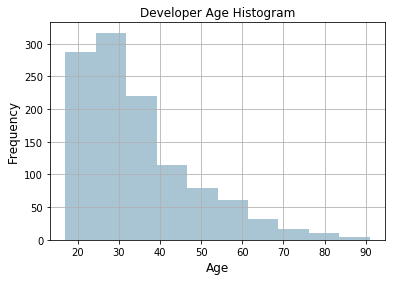

In [14]:
fig, ax = plt.subplots()
data['age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [15]:
data['age_bin'] = np.array(np.floor(np.array(data['age']) / 10.)) 
test['age_bin'] = np.array(np.floor(np.array(test['age']) / 10.)) 

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
data.head()

,surveyid,village,femaleres,age,married,children,hhsize,edu,cons_med_total,cons_ed,...,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,age_bin
0,926,91,1,28.0,1,4,6,10,0.000000,0.000000,...,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5,2.0
1,747,57,1,23.0,1,3,5,8,0.000000,0.000000,...,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3,2.0
2,1190,115,1,22.0,1,3,5,9,0.000000,0.000000,...,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5,2.0
3,1065,97,1,27.0,1,2,4,10,4.163996,1.681614,...,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0,2.0
4,806,42,0,59.0,0,4,6,10,0.800768,2.268844,...,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3,5.0


In [17]:
test.head()

,surveyid,village,femaleres,age,married,children,hhsize,edu,cons_med_total,cons_ed,...,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,age_bin
0,901,181,1,21.0,0,3,4,10,0.0,0.000000,...,0.0,0,0.0,0.0,1,0.000000,0,0.0,3,2.0
1,498,47,1,44.0,1,6,8,6,0.0,1.521460,...,0.0,0,0.0,0.0,0,0.000000,0,0.0,2,4.0
2,710,8,1,23.0,1,1,3,7,0.0,0.720692,...,0.0,0,0.0,0.0,1,0.080077,0,0.0,1,2.0
3,433,25,1,67.0,0,0,1,1,0.0,0.000000,...,0.0,0,0.0,0.0,0,0.000000,1,1.0,3,6.0
4,44,2,1,40.0,1,4,6,7,0.0,2.275517,...,0.0,0,0.0,0.0,0,0.000000,1,1.0,4,4.0


In [18]:
len(test.columns)

42

In [19]:
len(data.columns)

42

In [20]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [21]:
X = data.drop(['depressed','surveyid'], axis = 1)
y = data.depressed
from tpot import TPOTClassifier

C:\Users\OLALEYE ENIOLA\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\OLALEYE ENIOLA\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)

In [23]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components= 5)
#X = pca.fit_transform(X)
#y = pca.fit_transform(y)
#explained_variance = pca.explained_variance_ratio_

In [24]:
#explained_variance

In [25]:
model = GradientBoostingClassifier(n_estimators=90)# gave me best score
#model = XGBClassifier(n_estimators=200)
#model = GradientBoostingClassifier(n_estimators=90,subsample=0.9,min_samples_split=3
                                 # ,max_depth=4) 
#model  = RandomForestClassifier(n_estimators=8)
#model = ExtraTreesClassifier()
#model =TPOTClassifier(generations=5,population_size=10)
#model = SVC(degree=500,cache_size=20,tol =2)0.21
#model = SVC(coef0= 0.00001)
#from lightgbm import LGBMClassifier
#model = LGBMClassifier(n_estimators=200)

In [26]:
model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [27]:
pre = model.predict(X)

In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(pre,y)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.89      0.94      1072\n         1.0       0.37      1.00      0.54        71\n\n   micro avg       0.89      0.89      0.89      1143\n   macro avg       0.68      0.94      0.74      1143\nweighted avg       0.96      0.89      0.91      1143\n'

In [30]:
#test.drop(['depressed','surveyid'], axis = 1, inplace = True)
#from sklearn.decomposition import PCA
#pca = PCA(n_components= 5)
#test = pca.fit_transform(test)

In [31]:
predicted = model.predict(test.drop(['depressed','surveyid'],axis =1))

In [32]:
d = pd.DataFrame(predicted)

In [33]:
sub = pd.read_csv('sample_submission (1).csv')

In [34]:
sub['depressed'] = d

In [35]:
sub.to_csv('turinoniown.csv',index = False)

In [36]:
sub.depressed.value_counts()

0.0    278
1.0      8
Name: depressed, dtype: int64